# P6


In [19]:
# !pip install mlflow --quiet
# !pip install pyngrok --quiet
# !databricks configure --host https://community.cloud.databricks.com/vincentjuge@gmau


In [20]:
# import mlflow
# mlflow.set_tracking_uri("databricks")
# mlflow.set_experiment("module_P6")

In [21]:
# from pyngrok import conf, ngrok

# conf.get_default().auth_token = "29zP9P1odMu9Cc6uXkJiPLIHv5H_3EGpswe7jL1Ey6HZwyFs7"

# Open a HTTP tunnel on the default port 80
# <NgrokTunnel: "http://<public_sub>.ngrok.io" -> "http://localhost:80">

# http_tunnel = ngrok.connect()

# Open a SSH tunnel
# <NgrokTunnel: "tcp://0.tcp.ngrok.io:12345" -> "localhost:22">

# ssh_tunnel = ngrok.connect(22, "tcp")

In [22]:
import scipy.io
# mat = scipy.io.loadmat('file.mat')
# train_ds = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/oc-iml/P6/dogs_dataset/train_data.mat')

In [23]:
# test_ds = scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/oc-iml/P6/dogs_dataset/test_data.mat')

In [24]:
# train_ds.keys()

In [25]:
# test_ds.keys()

In [26]:
# train_ds['train_data'][0][1]

In [27]:
import tensorflow as tf
import tensorflow_datasets as tfds

# https://www.tensorflow.org/datasets/catalog/stanford_dogs
ds = tfds.load('stanford_dogs', split='train', shuffle_files=True, as_supervised=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

2022-06-02 21:04:54.418580: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "PERMISSION_DENIED: Error executing an HTTP request: HTTP response code 403 with body '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>403 Forbidden</title>
</head><body>
<h1>Forbidden</h1>
<p>You don't have permission to access /computeMetadata/v1/instance/service-accounts/default/token
on this server.</p>
</body></html>
'".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incomplete5D7LWA/stanford_dogs-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/stanford_dogs/0.2.0.incomplete5D7LWA/stanford_dogs-test.tfrecord*...:   0%|   …

Dataset stanford_dogs downloaded and prepared to ~/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


2022-06-02 21:06:02.431553: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-02 21:06:02.431585: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-02 21:06:02.431618: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (rocketstation): /proc/driver/nvidia/version does not exist
2022-06-02 21:06:02.433451: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


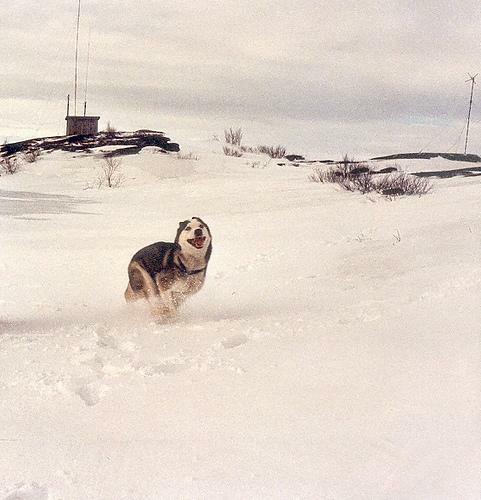

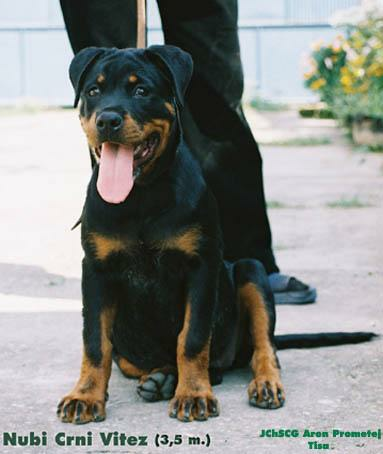

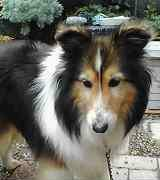

In [32]:
import matplotlib.pyplot as plt
from PIL import Image, ImageShow


for image, label in tfds.as_numpy(ds.take(3)):
  # print(type(image), type(label), label)
  # print(image)
  img = tf.keras.preprocessing.image.array_to_img(image)
  display(img)

In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

my_VGG16 = Sequential()  # Création d'un réseau de neurones vide 

# Ajout de la première couche de convolution, suivie d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))

# Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Ajout de la première couche de pooling
my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [30]:
from keras.layers import Flatten, Dense

my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

# Ajout de la première couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
my_VGG16.add(Dense(4096, activation='relu'))

# Ajout de la dernière couche fully-connected qui permet de classifier
my_VGG16.add(Dense(1000, activation='softmax'))

2022-06-02 21:06:03.096638: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13153337344 exceeds 10% of free system memory.
2022-06-02 21:06:04.488728: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13153337344 exceeds 10% of free system memory.
2022-06-02 21:06:07.025025: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 13153337344 exceeds 10% of free system memory.


In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import scipy.io

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_3. Consider increasing the input size. Received input shape [None, 1, 148, 32] which would produce output shape with a zero or negative value in a dimension.